In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shape-files-world/df_diet_type.csv
/kaggle/input/shape-files-world/Asia/Asia_Russia.prj
/kaggle/input/shape-files-world/Asia/Asia_Russia.shx
/kaggle/input/shape-files-world/Asia/Asia_Russia.shp.xml
/kaggle/input/shape-files-world/Asia/Asia_Russia-fgdc.xml
/kaggle/input/shape-files-world/Asia/Asia_Russia.shp
/kaggle/input/shape-files-world/Asia/Asia_Russia-iso19110.xml
/kaggle/input/shape-files-world/Asia/Asia_Russia-iso19139.xml
/kaggle/input/shape-files-world/Asia/Asia_Russia.dbf
/kaggle/input/shape-files-world/Asia/Asia_Russia.sbn
/kaggle/input/shape-files-world/USA_States/USA_States.prj
/kaggle/input/shape-files-world/USA_States/USA_States.shp.xml
/kaggle/input/shape-files-world/USA_States/USA_States.sbx
/kaggle/input/shape-files-world/USA_States/USA_States_README.txt
/kaggle/input/shape-files-world/USA_States/USA_States.shp
/kaggle/input/shape-files-world/USA_States/USA_States.dbf
/kaggle/input/shape-files-world/USA_States/USA_States.sbn
/kaggle/input/shape-files-worl

# libraries :

In [2]:
import ast
import warnings
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


# Master Data :

In [3]:
df_NA = pd.read_csv('/kaggle/input/df-na-state/df_NA.csv')
df_state = pd.read_csv('/kaggle/input/df-na-state/df_state.csv')

In [4]:
master_df = pd.read_csv('/kaggle/input/shape-files-world/df_diet_type.csv')

In [5]:
pd.set_option('display.max_columns', 100)

In [6]:
master_df.head()

,Contient,Country_State,cuisine,title,URL,rating,total_time,prep_time,cook_time,description,ingredients_list,instructions,serves,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,ingredients,animal_der,milk_der,plant_der,diet_type
0,North America,US,Southern Recipes,Sweet Potato Pie,https://www.allrecipes.com/recipe/12142/sweet-...,4.8,115.0,15.0,100.0,"Shared from a Southern recipe, this homemade s...","['1 (1 pound) sweet potato, with skin', '0.5 c...",['Place whole sweet potato in pot and cover wi...,8,3314,389.0,48.0,78.0,3.0,5.0,10.0,254.0,28.0,21.0,"['sugar', 'potato', 'vanilla', 'ground', 'eggs...",eggs,"butter, milk","sugar, potato, vanilla, ground, nutmeg, crust,...",nveg
1,North America,US,Southern Recipes,Fresh Southern Peach Cobbler,https://www.allrecipes.com/recipe/51535/fresh-...,4.7,60.0,20.0,40.0,This peach cobbler recipe makes the perfect de...,"['8 fresh peaches - peeled, pitted and sliced ...",['Preheat oven to 425 degrees F (220 degrees C...,4,4091,562.0,99.0,46.0,1.0,4.0,11.0,400.0,73.0,18.0,"['wedges', 'sugar', 'cornstarch', 'peaches', '...",NaN,butter,"wedges, sugar, cornstarch, peaches, juice, gro...",veg
2,North America,US,Southern Recipes,Best Fried Green Tomatoes,https://www.allrecipes.com/recipe/16760/best-f...,4.7,20.0,5.0,15.0,Fried green tomatoes are a quick and easy way ...,"['4 large green tomatoes', '2 eggs', '0.5 cup ...",['Slice tomatoes 1/2 inch thick. Discard the e...,4,1035,510.0,56.0,95.0,5.0,13.0,4.0,1136.0,10.0,27.0,"['ground', 'eggs', 'oil', 'salt', 'pepper', 'b...",eggs,milk,"ground, oil, salt, pepper, bread, tomatoes, cr...",nveg
3,North America,US,Southern Recipes,Best Jambalaya,https://www.allrecipes.com/recipe/31848/jambal...,4.8,65.0,20.0,45.0,"A spicy jambalaya with chicken, andouille saus...","['2 tablespoons peanut oil, divided', '1 table...","['Gather all ingredients.', 'Heat 1 tablespoon...",6,1083,465.0,42.0,73.0,3.0,28.0,6.0,1633.0,2.0,20.0,"['oil', 'boneless', 'breasts', 'flakes', 'caju...","sausage, chicken",NaN,"oil, boneless, breasts, flakes, cajun, bell, c...",nveg
4,North America,US,Southern Recipes,Authentic Louisiana Red Beans and Rice,https://www.allrecipes.com/recipe/58211/authen...,4.5,690.0,25.0,665.0,This easy authentic Louisiana red beans and ri...,"['1 pound dry kidney beans', '0.25 cup olive o...","['Gather all ingredients.', 'Rinse beans, and ...",8,1371,630.0,79.0,33.0,10.0,24.0,7.0,604.0,3.0,24.0,"['beans', 'sage', 'oil', 'cajun', 'bell', 'cel...","kidney, sausage",NaN,"beans, celery, sage, oil, onion, stalks, parsl...",nveg


In [7]:
master_df.title.nunique()==master_df.shape[0]

True

In [8]:
master_df = master_df.rename(columns={'Contient':'Continent'})

In [9]:
dummies = pd.get_dummies(master_df['diet_type'])
master_df = pd.concat([master_df, dummies], axis=1)
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14969 entries, 0 to 14968
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Continent            14969 non-null  object 
 1   Country_State        14969 non-null  object 
 2   cuisine              14969 non-null  object 
 3   title                14969 non-null  object 
 4   URL                  14969 non-null  object 
 5   rating               14969 non-null  float64
 6   total_time           14969 non-null  float64
 7   prep_time            14969 non-null  float64
 8   cook_time            14969 non-null  float64
 9   description          14969 non-null  object 
 10  ingredients_list     14969 non-null  object 
 11  instructions         14969 non-null  object 
 12  serves               14969 non-null  int64  
 13  rating_count         14969 non-null  int64  
 14  calories             14969 non-null  float64
 15  carbohydrateContent  14969 non-null 

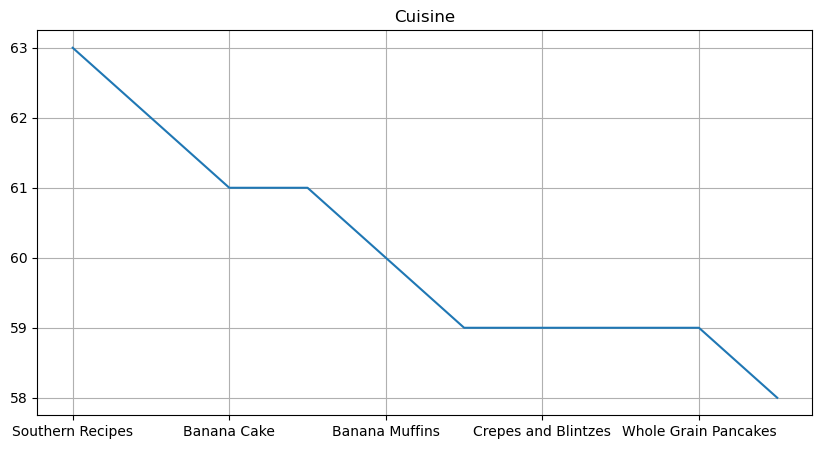

In [10]:
plt.figure(figsize=[10,5])
master_df.cuisine.value_counts()[:10].plot()
plt.grid(True)
plt.title('Cuisine')
plt.show()

In [11]:
eda_df = master_df.copy(deep=True)
eda_df['instructions']=eda_df['instructions'].map(ast.literal_eval)
eda_df['ingredients_list']=eda_df['ingredients_list'].map(ast.literal_eval)
eda_df['n_step']=eda_df['instructions'].apply(len)
eda_df['n_ingredients']=eda_df['ingredients_list'].apply(len)
drop_cols = ['URL','instructions','ingredients_list','description']
eda_df = eda_df.drop(drop_cols,axis=1)
eda_df.columns

Index(['Continent', 'Country_State', 'cuisine', 'title', 'rating',
       'total_time', 'prep_time', 'cook_time', 'serves', 'rating_count',
       'calories', 'carbohydrateContent', 'cholesterolContent', 'fiberContent',
       'proteinContent', 'saturatedFatContent', 'sodiumContent',
       'sugarContent', 'fatContent', 'ingredients', 'animal_der', 'milk_der',
       'plant_der', 'diet_type', 'nveg', 'veg', 'vegan', 'n_step',
       'n_ingredients'],
      dtype='object')

In [12]:
eda_NA = df_NA.copy(deep=True)
eda_NA['instructions']=eda_NA['instructions'].map(ast.literal_eval)
eda_NA['ingredients_list']=eda_NA['ingredients_list'].map(ast.literal_eval)
dummies = pd.get_dummies(eda_NA['diet_type'])
eda_NA = pd.concat([eda_NA, dummies], axis=1)
eda_NA['n_step']=eda_NA['instructions'].apply(len)
eda_NA['n_ingredients']=eda_NA['ingredients_list'].apply(len)
drop_cols = ['URL','instructions','ingredients_list','description','total_time_hours','time_segment']
eda_NA = eda_NA.drop(drop_cols,axis=1)
eda_NA.insert(0, 'Continent', 'North America')
eda_NA.columns

Index(['Continent', 'Country_State', 'cuisine', 'title', 'rating',
       'total_time', 'prep_time', 'cook_time', 'serves', 'rating_count',
       'calories', 'carbohydrateContent', 'cholesterolContent', 'fiberContent',
       'proteinContent', 'saturatedFatContent', 'sodiumContent',
       'sugarContent', 'fatContent', 'ingredients', 'animal_der', 'milk_der',
       'plant_der', 'diet_type', 'nveg', 'veg', 'vegan', 'n_step',
       'n_ingredients'],
      dtype='object')

In [13]:
eda_df = eda_df[eda_df.Continent!='North America']
eda_df = pd.concat([eda_NA,eda_df],axis=0)
eda_df.reset_index(drop=True,inplace=True)
eda_df.to_csv('EDA_master_df.csv',index=False)
print(eda_df.Continent.unique())
print(' ')
print(eda_df.Country_State.unique())
print(' ')
print(eda_df.columns)

['North America' 'Asia' 'Europe' 'Africa' 'Australia' 'South America']
 
['Canada' 'US' 'Cuba' 'Jamaica' 'Puerto Rico' 'Mexico' 'Korea' 'ireland'
 'sweden' 'persia' 'norway' 'bangladesh' 'France' 'switzerland' 'spain'
 'finland' 'hungary' 'malaysia' 'India' 'belgium' 'lebanon' 'dutch'
 'russia' 'Italy' 'austria' 'greece' 'pakistan' 'China' 'wales' 'Japan'
 'poland' 'mediterranean' 'Thailand' 'indonesia' 'Nigeria' 'South Africa'
 'Sudan' 'Congo' 'Tanzania' ' Algeria' 'Egypt' 'Morocco' 'Ehiopia'
 'denmark' 'turkey' 'czech republic' 'portugal' 'germany' 'vietnam'
 'filipino' 'australia' 'uk' 'israel' 'Chile' 'Brazil' 'Colombia'
 'Argentina' 'Peru' 'scotland']
 
Index(['Continent', 'Country_State', 'cuisine', 'title', 'rating',
       'total_time', 'prep_time', 'cook_time', 'serves', 'rating_count',
       'calories', 'carbohydrateContent', 'cholesterolContent', 'fiberContent',
       'proteinContent', 'saturatedFatContent', 'sodiumContent',
       'sugarContent', 'fatContent', 'ingredient

In [14]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14767 entries, 0 to 14766
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Continent            14767 non-null  object 
 1   Country_State        14767 non-null  object 
 2   cuisine              14767 non-null  object 
 3   title                14767 non-null  object 
 4   rating               14767 non-null  float64
 5   total_time           14767 non-null  float64
 6   prep_time            14767 non-null  float64
 7   cook_time            14767 non-null  float64
 8   serves               14767 non-null  int64  
 9   rating_count         14767 non-null  int64  
 10  calories             14767 non-null  float64
 11  carbohydrateContent  14767 non-null  float64
 12  cholesterolContent   14767 non-null  float64
 13  fiberContent         14767 non-null  float64
 14  proteinContent       14767 non-null  float64
 15  saturatedFatContent  14767 non-null 

In [15]:
keep_cols = ['Continent','cuisine','Country_State','rating','total_time','rating_count','calories',
       'carbohydrateContent', 'cholesterolContent', 'fiberContent',
       'proteinContent', 'saturatedFatContent', 'sodiumContent',
       'sugarContent', 'fatContent','nveg', 'veg', 'vegan'] # we may include  'n_step', 'n_ingredients'
master_df = master_df.loc[:, keep_cols]
master_df.columns

Index(['Continent', 'cuisine', 'Country_State', 'rating', 'total_time',
       'rating_count', 'calories', 'carbohydrateContent', 'cholesterolContent',
       'fiberContent', 'proteinContent', 'saturatedFatContent',
       'sodiumContent', 'sugarContent', 'fatContent', 'nveg', 'veg', 'vegan'],
      dtype='object')

In [16]:
master_df.to_csv('Master Data.csv',index=False)
master_df.Country_State = master_df.Country_State.apply(lambda x: x.capitalize())

# Shape Data :

In [17]:
USA_States = gpd.read_file('/kaggle/input/shape-files-world/USA_States/USA_States.shp')
South_America = gpd.read_file('/kaggle/input/shape-files-world/South_America/South_America.shp')
Americas = gpd.read_file('/kaggle/input/shape-files-world/Americas/Americas.shp')
# Canada_Provinces = gpd.read_file('/kaggle/input/shape-files-world/Canada_Provinces/Canada_Provinces.shp')
# China_Pl = gpd.read_file('/kaggle/input/shape-files-world/China_En/China_Pl.shp')
Europe = gpd.read_file('/kaggle/input/shape-files-world/Europe/Europe.shp')
World_Countries = gpd.read_file('/kaggle/input/shape-files-world/World_Countries/World_Countries.shp')
Asia_shape = gpd.read_file('/kaggle/input/shape-files-world/Asia/Asia_Russia.shp')

## 1. North America :

In [18]:
df_NA.title.nunique()==df_NA.shape[0]

True

In [19]:
Americas.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Argentina,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195..."
3,Anguilla (UK),"POLYGON ((-63.16778 18.16444, -63.15695 18.177..."
4,Barbados,"POLYGON ((-59.53306 13.05055, -59.54542 13.069..."


In [20]:
df_NA.drop(df_NA.columns[-2:],axis=1,inplace=True)

In [21]:
na_countries = ["Canada", "United States", "Cuba", "Jamaica", "Puerto Rico (US)", "Mexico"]
shape_na = Americas[Americas["COUNTRY"].isin(na_countries)]
df_NA['Country_State'] = df_NA['Country_State'].replace({'Canada': 'Canada',
                                       'US': 'United States',
                                       'Cuba': 'Cuba',
                                       'Jamaica': 'Jamaica',
                                       'Puerto Rico': 'Puerto Rico (US)',
                                       'Mexico': 'Mexico'})

In [22]:
dummies = pd.get_dummies(df_NA['diet_type'])
df_NA = pd.concat([df_NA.drop(['diet_type'],axis=1), dummies], axis=1)

In [23]:
keep_cols = ['Country_State','rating','total_time','rating_count','calories',
       'carbohydrateContent', 'cholesterolContent', 'fiberContent',
       'proteinContent', 'saturatedFatContent', 'sodiumContent',
       'sugarContent', 'fatContent','nveg', 'veg', 'vegan']
df_NA = df_NA.loc[:, keep_cols]
df_NA.columns

Index(['Country_State', 'rating', 'total_time', 'rating_count', 'calories',
       'carbohydrateContent', 'cholesterolContent', 'fiberContent',
       'proteinContent', 'saturatedFatContent', 'sodiumContent',
       'sugarContent', 'fatContent', 'nveg', 'veg', 'vegan'],
      dtype='object')

In [24]:
countries = list(df_NA.Country_State.unique())
cols = list(df_NA.columns)[1:]
NA = pd.DataFrame(columns=['COUNTRY'] + cols)

for country in countries:
    df_ = df_NA[df_NA.Country_State == country].copy()
    row = [country]
    for col in cols:
        # average wrt their countries
        if col == 'total_time':
            row.append(df_[col].median())
        else:
            row.append(df_[col].mean())
    NA.loc[len(NA)] = row
NA.iloc[:, -3:] = NA.iloc[:, -3:].apply(lambda x: x * 100)
NA = NA.rename(columns={col: col+'_perc' for col in NA.iloc[:, -3:].columns})
del df_

In [25]:
NA

,COUNTRY,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg_perc,veg_perc,vegan_perc
0,Canada,4.148440,45.0,300.983563,279.903053,25.604160,49.991278,2.490104,12.965783,5.510902,497.478028,11.120094,14.028178,42.670245,29.855753,27.474002
1,United States,4.165172,50.0,180.799777,323.669113,33.104340,74.219209,2.293555,11.830249,6.281110,532.473357,14.241225,16.371889,69.097001,18.107849,12.795150
2,Cuba,4.241509,85.0,43.283019,353.226415,25.547170,67.924528,3.320755,22.037736,4.905660,797.528302,7.396226,16.905660,64.150943,5.660377,30.188679
3,Jamaica,4.353846,75.0,84.076923,315.051282,30.615385,62.512821,2.923077,17.307692,5.076923,917.256410,10.230769,14.153846,66.666667,12.820513,20.512821
4,Puerto Rico (US),4.427273,65.0,35.818182,348.472727,37.254545,52.618182,2.400000,13.763636,6.218182,686.963636,13.818182,16.200000,54.545455,25.454545,20.000000
5,Mexico,4.160623,55.0,158.222852,387.898961,34.969783,75.067044,4.715770,20.077432,7.442871,820.056657,6.928234,19.142587,69.027384,16.430595,14.542021


In [26]:
north_america = pd.merge(left = Americas,
                right = NA,
                left_on = 'COUNTRY',
                right_on = 'COUNTRY',
                how = 'left')
north_america = north_america.dropna().reset_index(drop=True)
# gdf.to_file("my_file.shp", driver='ESRI Shapefile')
north_america.to_file('North America.shp', driver='ESRI Shapefile')
north_america

,COUNTRY,geometry,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg_perc,veg_perc,vegan_perc
0,Canada,"MULTIPOLYGON (((-84.47945 77.29443, -84.46764 ...",4.148440,45.0,300.983563,279.903053,25.604160,49.991278,2.490104,12.965783,5.510902,497.478028,11.120094,14.028178,42.670245,29.855753,27.474002
1,Cuba,"MULTIPOLYGON (((-76.94608 21.45221, -76.88390 ...",4.241509,85.0,43.283019,353.226415,25.547170,67.924528,3.320755,22.037736,4.905660,797.528302,7.396226,16.905660,64.150943,5.660377,30.188679
2,Jamaica,"POLYGON ((-76.65770 17.92925, -76.69362 17.937...",4.353846,75.0,84.076923,315.051282,30.615385,62.512821,2.923077,17.307692,5.076923,917.256410,10.230769,14.153846,66.666667,12.820513,20.512821
3,Mexico,"MULTIPOLYGON (((-97.77687 22.26805, -97.78168 ...",4.160623,55.0,158.222852,387.898961,34.969783,75.067044,4.715770,20.077432,7.442871,820.056657,6.928234,19.142587,69.027384,16.430595,14.542021
4,Puerto Rico (US),"MULTIPOLYGON (((-65.83667 18.05583, -65.84029 ...",4.427273,65.0,35.818182,348.472727,37.254545,52.618182,2.400000,13.763636,6.218182,686.963636,13.818182,16.200000,54.545455,25.454545,20.000000
5,United States,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",4.165172,50.0,180.799777,323.669113,33.104340,74.219209,2.293555,11.830249,6.281110,532.473357,14.241225,16.371889,69.097001,18.107849,12.795150


<AxesSubplot:>

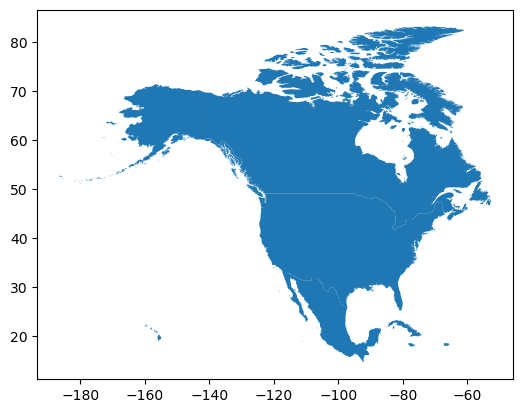

In [27]:
north_america.geometry.plot()

## 2. USA_States:

In [28]:
df_state.title.nunique()==df_state.shape[0]

False

In [29]:
eda_df_states = df_state.copy(deep=True)
eda_df_states['instructions']=eda_df_states['instructions'].map(ast.literal_eval)
eda_df_states['ingredients_list']=eda_df_states['ingredients_list'].map(ast.literal_eval)
eda_df_states['n_step']=eda_df_states['instructions'].apply(len)
eda_df_states['n_ingredients']=eda_df_states['ingredients_list'].apply(len)
drop_cols = ['URL','instructions','ingredients_list','description']
eda_df_states = eda_df_states.drop(drop_cols,axis=1)
eda_df_states.to_csv('eda_df_states.csv',index=True)
eda_df_states.columns

Index(['Country', 'State', 'cuisine', 'title', 'rating', 'total_time',
       'prep_time', 'cook_time', 'serves', 'rating_count', 'calories',
       'carbohydrateContent', 'cholesterolContent', 'fiberContent',
       'proteinContent', 'saturatedFatContent', 'sodiumContent',
       'sugarContent', 'fatContent', 'ingredients', 'animal_der', 'milk_der',
       'plant_der', 'diet_type', 'n_step', 'n_ingredients'],
      dtype='object')

In [30]:
dummies = pd.get_dummies(df_state['diet_type'])
df_state = pd.concat([df_state.drop(['diet_type'],axis=1), dummies], axis=1)
keep_cols = ['Country','State','rating','total_time','rating_count','calories',
       'carbohydrateContent', 'cholesterolContent', 'fiberContent',
       'proteinContent', 'saturatedFatContent', 'sodiumContent',
       'sugarContent', 'fatContent','nveg', 'veg', 'vegan'] # we may include  'n_step', 'n_ingredients'
df_state = df_state.loc[:, keep_cols]
df_state.columns

Index(['Country', 'State', 'rating', 'total_time', 'rating_count', 'calories',
       'carbohydrateContent', 'cholesterolContent', 'fiberContent',
       'proteinContent', 'saturatedFatContent', 'sodiumContent',
       'sugarContent', 'fatContent', 'nveg', 'veg', 'vegan'],
      dtype='object')

In [31]:
USA_States.drop(['STATE_FIPS','STATE_ABBR'],axis=1,inplace=True)
USA_States.head()

,STATE_NAME,geometry
0,Washington,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
1,Montana,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
2,Maine,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
3,North Dakota,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
4,South Dakota,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."


In [32]:
print('shape data ',USA_States.STATE_NAME.unique())
print('')
print('data ',df_state.State.unique())
extra = set(USA_States.STATE_NAME.unique())-set(df_state.State.unique())
print(f'{len(extra)} extra found {extra}')
missing = set(df_state.State.unique())-set(USA_States.STATE_NAME.unique())
print(f'{len(missing)} missing found {missing}')

shape data  ['Washington' 'Montana' 'Maine' 'North Dakota' 'South Dakota' 'Wyoming'
 'Wisconsin' 'Idaho' 'Vermont' 'Minnesota' 'Oregon' 'New Hampshire' 'Iowa'
 'Massachusetts' 'Nebraska' 'New York' 'Pennsylvania' 'Connecticut'
 'Rhode Island' 'New Jersey' 'Indiana' 'Nevada' 'Utah' 'California' 'Ohio'
 'Illinois' 'District of Columbia' 'Delaware' 'West Virginia' 'Maryland'
 'Colorado' 'Kentucky' 'Kansas' 'Virginia' 'Missouri' 'Arizona' 'Oklahoma'
 'North Carolina' 'Tennessee' 'Texas' 'New Mexico' 'Alabama' 'Mississippi'
 'Georgia' 'South Carolina' 'Arkansas' 'Louisiana' 'Florida' 'Michigan'
 'Hawaii' 'Alaska']

data  ['Missouri' 'Iowa' 'North Dakota' 'South Dakota' 'Kansas' 'Nebraska'
 'Connecticut' 'Maine' 'New Hampshire' 'Rhode Island' 'Vermont' 'Delaware'
 'New Jersey' 'Virginia' 'South Carolina' 'Alabama' 'Arkansas' 'Kentucky'
 'Tennessee' 'West Virginia' 'Mississippi' 'Nevada' 'Hawaii' 'Minnesota'
 'Wisconsin' 'Texas' 'Michigan' 'Indiana' 'Ohio' 'Massachusetts'
 'Pennsylvania' 'New

In [33]:
df_state.head()

,Country,State,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg,veg,vegan
0,US,Missouri,4.5,60.0,386,228.0,18.0,50.0,7.0,18.0,4.0,191.0,10.0,10.0,1,0,0
1,US,Missouri,4.6,130.0,704,338.0,44.0,26.0,1.0,2.0,7.0,177.0,30.0,18.0,1,0,0
2,US,Missouri,4.5,25.0,474,374.0,39.0,57.0,4.0,11.0,5.0,886.0,9.0,19.0,1,0,0
3,US,Missouri,4.7,14440.0,394,34.0,8.0,1.0,0.0,1.0,0.0,3.0,5.0,0.0,0,1,0
4,US,Missouri,4.7,30.0,19,185.0,29.0,0.0,2.0,6.0,1.0,39.0,1.0,5.0,0,0,1


In [34]:
states = list(df_state.State.unique())
cols = list(df_state.columns)[2:]
us_states = pd.DataFrame(columns=['State'] + cols)

for state in states:
    df_ = df_state[df_state.State == state].copy()
    row = [state]
    for col in cols:
        # average wrt their countries
        if col == 'total_time':
            row.append(df_[col].median())
        else:
            row.append(df_[col].mean())
    us_states.loc[len(us_states)] = row
us_states.iloc[:, -3:] = us_states.iloc[:, -3:].apply(lambda x: x * 100)
us_states = us_states.rename(columns={col: col+'_perc' for col in us_states.iloc[:, -3:].columns})
del df_

In [35]:
USA_States = USA_States.rename(columns={'STATE_NAME':'State'})

In [36]:
us_states = pd.merge(left = USA_States,
                right = us_states,
                left_on = 'State',
                right_on = 'State',
                how = 'left')
us_states = us_states.dropna().reset_index(drop=True)
us_states.to_file('US_states.shp', driver='ESRI Shapefile')
# us_states.to_csv('US_states.csv',index=False)

In [37]:
us_states

,State,geometry,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg_perc,veg_perc,vegan_perc
0,Washington,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",4.504464,47.5,283.589286,359.866071,29.339286,64.821429,2.357143,15.205357,7.071429,648.669643,11.705357,20.267857,55.357143,31.250000,13.392857
1,Montana,"POLYGON ((-111.47543 44.70216, -111.48080 44.6...",4.386364,57.5,134.045455,400.681818,27.318182,99.681818,2.590909,28.545455,7.227273,1043.363636,8.318182,19.681818,81.818182,13.636364,4.545455
2,Maine,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ...",4.261538,55.0,350.948718,388.410256,34.769231,85.128205,2.589744,15.897436,9.230769,517.589744,11.615385,20.974359,87.179487,5.128205,7.692308
3,North Dakota,"POLYGON ((-98.73044 45.93827, -99.00683 45.939...",4.240000,120.0,21.000000,402.800000,24.400000,42.000000,1.200000,13.200000,5.400000,492.400000,4.400000,28.200000,80.000000,20.000000,0.000000
4,South Dakota,"POLYGON ((-102.78838 42.99530, -103.00588 42.9...",4.521053,55.0,228.526316,269.684211,29.526316,47.052632,2.684211,8.789474,6.000000,327.105263,14.421053,13.421053,52.631579,21.052632,26.315789
5,Wyoming,"POLYGON ((-104.05362 41.69822, -104.05550 41.5...",4.364000,80.0,141.840000,424.240000,24.200000,99.520000,2.400000,27.680000,9.000000,1031.440000,12.320000,23.960000,80.000000,4.000000,16.000000
6,Wisconsin,"MULTIPOLYGON (((-87.74855 44.96162, -87.83999 ...",4.413725,60.0,113.117647,403.000000,30.745098,78.156863,2.686275,20.431373,7.764706,853.960784,8.490196,21.450980,60.784314,21.568627,17.647059
7,Idaho,"POLYGON ((-117.02630 43.67903, -117.02379 43.7...",4.246667,44.0,157.433333,348.966667,28.633333,72.066667,2.066667,20.100000,6.400000,681.633333,8.233333,16.833333,66.666667,20.000000,13.333333
8,Vermont,"POLYGON ((-73.25806 42.74606, -73.26928 42.747...",4.031579,70.0,48.578947,297.105263,31.105263,35.000000,2.526316,9.157895,4.368421,265.157895,14.684211,15.578947,73.684211,15.789474,10.526316
9,Minnesota,"POLYGON ((-91.73037 43.49957, -92.07753 43.499...",4.320968,80.0,124.241935,375.725806,34.000000,67.193548,2.774194,17.580645,6.822581,652.790323,8.419355,18.645161,67.741935,20.967742,11.290323


<AxesSubplot:>

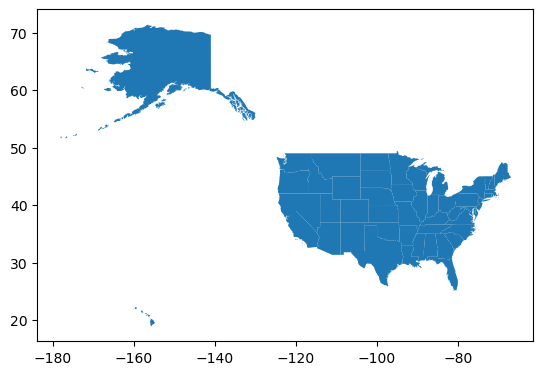

In [38]:
us_states.geometry.plot()

## 3. South America :

In [39]:
master_df.Continent.unique()

array(['North America', 'Asia', 'Europe', 'Africa', 'Australia',
       'South America'], dtype=object)

In [40]:
df_SA = master_df[master_df.Continent=='South America']
df_SA.head()

,Continent,cuisine,Country_State,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg,veg,vegan
14817,South America,Chilean Recipes,Chile,4.6,5.0,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0
14818,South America,Chilean Recipes,Chile,4.3,60.0,15,286.0,36.0,25.0,2.0,5.0,6.0,369.0,1.0,14.0,0,1,0
14819,South America,Chilean Recipes,Chile,4.1,70.0,38,530.0,54.0,113.0,3.0,16.0,8.0,653.0,10.0,28.0,1,0,0
14820,South America,Chilean Recipes,Chile,3.9,95.0,19,85.0,15.0,6.0,0.0,2.0,1.0,44.0,15.0,2.0,0,1,0
14821,South America,Chilean Recipes,Chile,4.5,40.0,12,477.0,49.0,74.0,2.0,7.0,18.0,614.0,1.0,28.0,0,1,0


In [41]:
df_SA.cuisine.unique()

array(['Chilean Recipes', 'Brazilian Recipes', 'Colombian Recipes',
       'Argentinian Recipes', 'Peruvian Recipes'], dtype=object)

In [42]:
countries = list(df_SA.Country_State.unique())
cols = list(df_SA.columns)[3:]
SA = pd.DataFrame(columns=['COUNTRY'] + cols)

for country in countries:
    df_ = df_SA[df_SA.Country_State == country].copy()
    row = [country]
    for col in cols:
        # average wrt their countries
        if col == 'total_time':
            row.append(df_[col].median())
        else:
            row.append(df_[col].mean())
    SA.loc[len(SA)] = row
SA.iloc[:, -3:] = SA.iloc[:, -3:].apply(lambda x: x * 100)
SA = SA.rename(columns={col: col+'_perc' for col in SA.iloc[:, -3:].columns})
del df_

In [43]:
SA

,COUNTRY,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg_perc,veg_perc,vegan_perc
0,Chile,3.578947,60.0,11.052632,217.000000,22.000000,45.894737,2.000000,8.368421,3.894737,215.157895,6.157895,10.789474,52.631579,26.315789,21.052632
1,Brazil,3.921818,60.0,72.527273,325.654545,35.363636,49.000000,3.236364,12.472727,6.527273,451.127273,15.381818,15.254545,72.727273,16.363636,10.909091
2,Colombia,3.533333,40.0,16.888889,445.222222,33.333333,64.777778,2.666667,8.000000,6.000000,465.666667,6.111111,31.888889,33.333333,33.333333,33.333333
3,Argentina,4.350000,75.0,35.071429,285.964286,24.535714,38.928571,2.214286,8.392857,4.750000,402.464286,4.250000,17.428571,50.000000,7.142857,42.857143
4,Peru,3.719444,70.0,22.972222,413.583333,41.194444,85.972222,3.305556,20.472222,5.555556,484.555556,10.111111,18.472222,75.000000,16.666667,8.333333


In [44]:
df_SA.Country_State.unique()

array(['Chile', 'Brazil', 'Colombia', 'Argentina', 'Peru'], dtype=object)

In [45]:
South_America

,COUNTRY,geometry
0,Argentina,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195..."
1,Bolivia,"POLYGON ((-62.19884 -20.47139, -62.26945 -20.5..."
2,Brazil,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ..."
3,Chile,"MULTIPOLYGON (((-73.61806 -51.63390, -73.60494..."
4,Colombia,"MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ..."
5,Ecuador,"MULTIPOLYGON (((-78.70903 -4.58479, -78.72348 ..."
6,French Guiana (France),"POLYGON ((-54.60378 2.32919, -54.49917 2.36500..."
7,Falkland Islands (UK),"MULTIPOLYGON (((-59.79139 -51.24945, -59.73195..."
8,Guyana,"POLYGON ((-60.08087 5.16151, -60.08195 5.17305..."
9,Suriname,"POLYGON ((-54.09445 3.29500, -54.11876 3.27778..."


In [46]:
south_america = pd.merge(left = South_America,
                right = SA,
                left_on = 'COUNTRY',
                right_on = 'COUNTRY',
                how = 'left')
south_america = south_america.dropna().reset_index(drop=True)
south_america.to_file('South America.shp', driver='ESRI Shapefile')
# south_america.to_csv('South America.csv',index=False)
south_america

,COUNTRY,geometry,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg_perc,veg_perc,vegan_perc
0,Argentina,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195...",4.350000,75.0,35.071429,285.964286,24.535714,38.928571,2.214286,8.392857,4.750000,402.464286,4.250000,17.428571,50.000000,7.142857,42.857143
1,Brazil,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ...",3.921818,60.0,72.527273,325.654545,35.363636,49.000000,3.236364,12.472727,6.527273,451.127273,15.381818,15.254545,72.727273,16.363636,10.909091
2,Chile,"MULTIPOLYGON (((-73.61806 -51.63390, -73.60494...",3.578947,60.0,11.052632,217.000000,22.000000,45.894737,2.000000,8.368421,3.894737,215.157895,6.157895,10.789474,52.631579,26.315789,21.052632
3,Colombia,"MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ...",3.533333,40.0,16.888889,445.222222,33.333333,64.777778,2.666667,8.000000,6.000000,465.666667,6.111111,31.888889,33.333333,33.333333,33.333333
4,Peru,"POLYGON ((-69.56750 -10.95056, -69.56844 -10.9...",3.719444,70.0,22.972222,413.583333,41.194444,85.972222,3.305556,20.472222,5.555556,484.555556,10.111111,18.472222,75.000000,16.666667,8.333333


<AxesSubplot:>

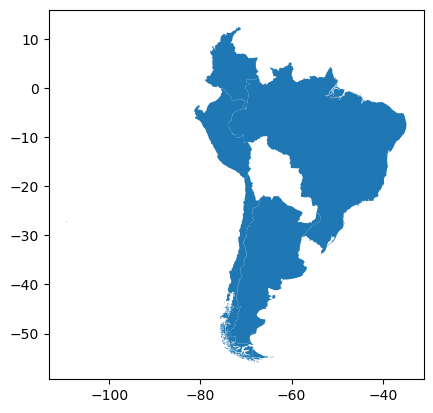

In [47]:
south_america.geometry.plot()

## 4. Asia :


In [48]:
df_asia = master_df[master_df.Continent=='Asia']
df_asia.head()

,Continent,cuisine,Country_State,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg,veg,vegan
6204,Asia,Korean Soups and Stews,Korea,4.6,50.0,58,65.0,1.0,17.0,0.0,7.0,1.0,940.0,0.0,4.0,1,0,0
6205,Asia,Korean Soups and Stews,Korea,3.7,35.0,6,289.0,25.0,0.0,9.0,26.0,2.0,661.0,8.0,12.0,1,0,0
6206,Asia,Korean Soups and Stews,Korea,3.9,20.0,16,242.0,7.0,99.0,2.0,20.0,3.0,415.0,1.0,17.0,1,0,0
6207,Asia,Korean Soups and Stews,Korea,3.8,40.0,6,59.0,5.0,0.0,2.0,5.0,0.0,378.0,1.0,3.0,0,0,1
6208,Asia,Korean Soups and Stews,Korea,4.2,110.0,5,518.0,36.0,86.0,2.0,24.0,11.0,1048.0,28.0,29.0,1,0,0


In [49]:
df_asia.cuisine.unique()

array(['Korean Soups and Stews', 'Kalbi', 'Bulgogi', 'Persian Recipes',
       'Bangladeshi Recipes', 'Malaysian Recipes', 'Indian Drinks',
       'Indian Main Dishes', 'Indian Side Dishes', 'Indian Bread',
       'Indian Desserts', 'Samosa Recipes', 'Chutney', 'Lebanese Recipes',
       'Pakistani Recipes', 'Chinese Pork Main Dishes',
       'Chinese Chicken Main Dishes', 'Chinese Seafood Main Dishes',
       'Chinese Beef Main Dishes', 'Chinese Appetizers',
       'Chinese Soups and Stews', 'Chicken Stir-Fry', 'Beef Stir-Fry',
       'Pork Stir-Fry', 'Shrimp Stir-Fry', 'Vegetarian Stir-Fry',
       'Japanese Appetizers', 'Japanese Main Dishes',
       'Japanese Soups and Stews', 'Thai Recipes', 'Thai Appetizers',
       'Thai Soups and Stews', 'Thai Desserts', 'Thai Main Dishes',
       'Thai Curry Main Dishes', 'Pad Thai', 'Thai Pork Main Dishes',
       'Thai Chicken Main Dishes', 'Thai Seafood Main Dishes',
       'Indonesian Recipes', 'Turkish Recipes', 'Vietnamese Recipes',
    

In [50]:
countries = list(df_asia.Country_State.unique())
cols = list(df_asia.columns)[3:]
asia = pd.DataFrame(columns=['COUNTRY'] + cols)

for country in countries:
    df_ = df_asia[df_asia.Country_State == country].copy()
    row = [country]
    for col in cols:
        # average wrt their countries
        if col == 'total_time':
            row.append(df_[col].median())
        else:
            row.append(df_[col].mean())
    asia.loc[len(asia)] = row
asia.iloc[:, -3:] = asia.iloc[:, -3:].apply(lambda x: x * 100)
asia = asia.rename(columns={col: col+'_perc' for col in asia.iloc[:, -3:].columns})
del df_

In [51]:
asia.COUNTRY = asia.COUNTRY.apply(lambda x: x.capitalize())
asia.COUNTRY

0          Korea
1         Persia
2     Bangladesh
3       Malaysia
4          India
5        Lebanon
6       Pakistan
7          China
8          Japan
9       Thailand
10     Indonesia
11        Turkey
12       Vietnam
13      Filipino
14        Israel
Name: COUNTRY, dtype: object

In [52]:
df_asia.Country_State.unique()

array(['Korea', 'Persia', 'Bangladesh', 'Malaysia', 'India', 'Lebanon',
       'Pakistan', 'China', 'Japan', 'Thailand', 'Indonesia', 'Turkey',
       'Vietnam', 'Filipino', 'Israel'], dtype=object)

In [53]:
Asia_shape = Asia_shape.drop(['CC','REGION','iso_alpha2','iso_alpha3','iso_num','tld'],axis=1)
Asia_shape['NAME'] = Asia_shape['NAME'].replace(['Macau (China)', 'Hong Kong (China)', 'Taiwan'], 'CHINA')
country_list = Asia_shape.NAME.unique()
print(country_list)

['AFGHANISTAN' 'BANGLADESH' 'BHUTAN' 'BURMA'
 'British Indian Ocean Territory (UK)' 'CAMBODIA' 'CHINA' 'INDIA'
 'In dispute BHUTAN/CHINA' 'In dispute INDIA/NEPAL'
 'In dispute CHINA/INDIA' 'In dispute CHINA/JAPAN/TAIWAN'
 'In dispute INDIA/PAKISTAN' 'In dispute JAPAN/SOUTH KOREA'
 'In dispute-Paracel Islands' 'JAPAN' 'KAZAKHSTAN' 'KYRGYZSTAN'
 'Korean islands under UN jurisdiction' 'LAOS' 'MALDIVES' 'MONGOLIA'
 'NEPAL' 'NORTH KOREA' 'PAKISTAN' 'SOUTH KOREA' 'SRI LANKA' 'TAJIKISTAN'
 'THAILAND' 'TURKMENISTAN' 'UZBEKISTAN' 'VIETNAM' 'RUSSIA'
 'In dispute JAPAN/RUSSIA']


In [54]:
from shapely.ops import unary_union # making MULTIPOLYGON from POLYGON
asia_shape = pd.DataFrame()
for country in country_list:
    data = Asia_shape[Asia_shape.NAME==country]
    geoms = data["geometry"].tolist()
    merged_geom = unary_union(geoms)
    merged_df = gpd.GeoDataFrame({"Country": [country], "geometry": [merged_geom]})
    asia_shape = pd.concat([asia_shape,merged_df],axis=0)
del data

In [55]:
# Create a list to keep
keep_values = ['AFGHANISTAN', 'BANGLADESH', 'BHUTAN', 'BURMA', 'CAMBODIA', 'CHINA', 'INDIA', 'JAPAN', 'KAZAKHSTAN', 'KYRGYZSTAN', 'LAOS', 'MALDIVES', 'MONGOLIA', 'Macau (China)', 'NEPAL', 'PAKISTAN', 'SOUTH KOREA', 'SRI LANKA', 'TAJIKISTAN', 'THAILAND', 'TURKMENISTAN', 'Taiwan', 'UZBEKISTAN', 'VIETNAM', 'Hong Kong (China)', 'RUSSIA']
# keep rows
asia_shape = asia_shape[asia_shape['Country'].isin(keep_values)]

In [56]:
print('shape ',asia_shape.Country.unique())
print(' ')
print('data ',asia.COUNTRY.unique())

shape  ['AFGHANISTAN' 'BANGLADESH' 'BHUTAN' 'BURMA' 'CAMBODIA' 'CHINA' 'INDIA'
 'JAPAN' 'KAZAKHSTAN' 'KYRGYZSTAN' 'LAOS' 'MALDIVES' 'MONGOLIA' 'NEPAL'
 'PAKISTAN' 'SOUTH KOREA' 'SRI LANKA' 'TAJIKISTAN' 'THAILAND'
 'TURKMENISTAN' 'UZBEKISTAN' 'VIETNAM' 'RUSSIA']
 
data  ['Korea' 'Persia' 'Bangladesh' 'Malaysia' 'India' 'Lebanon' 'Pakistan'
 'China' 'Japan' 'Thailand' 'Indonesia' 'Turkey' 'Vietnam' 'Filipino'
 'Israel']


In [57]:
# Create a list to keep
keep_values = ['BANGLADESH', 'CHINA', 'INDIA', 'JAPAN', 'PAKISTAN', 'SOUTH KOREA', 'THAILAND', 'TURKMENISTAN', 'VIETNAM']
# keep rows
asia_shape = asia_shape[asia_shape['Country'].isin(keep_values)].reset_index(drop=True)
asia_shape.Country = asia_shape.Country.apply(lambda x: x.capitalize())

In [58]:
keep_values = ['Iran', 'Malaysia', 'Lebanon', 'Indonesia', 'Israel','Philippines']
df_ = World_Countries[World_Countries['COUNTRY'].isin(keep_values)]
df_ = df_.rename(columns={'COUNTRY':'Country'})
asia_shape = pd.concat([asia_shape,df_],axis=0).reset_index(drop=True)
del df_

In [59]:
# Korea --SOUTH KOREA
# persia -- Iran**
# bangladesh -- BANGLADESH
# malaysia -- 
# India -- INDIA
# 5        lebanon -- 
# 6       pakistan -- PAKISTAN
# 7          China -- CHINA
# 8          Japan -- JAPAN
# 9       Thailand -- THAILAND
# 10     indonesia -- 
# 11        turkey -- TURKMENISTAN
# 12       vietnam -- VIETNAM
# 13      filipino -- Philippines**
# 14        israel --

In [60]:
asia_shape['Country'] = asia_shape['Country'].replace({'South korea':'Korea',
                                    'Iran':'Persia',
                                    'malaysia':'Malaysia',
                                    'Turkmenistan':'Turkey',
                                    'Philippines':'Filipino'})
asia_shape = asia_shape.rename(columns={'Country':'COUNTRY'})
asia_shape

,COUNTRY,geometry
0,Bangladesh,"MULTIPOLYGON (((92.33036 20.61333, 92.33039 20..."
1,China,"MULTIPOLYGON (((109.69997 18.18625, 109.70081 ..."
2,India,"MULTIPOLYGON (((93.80247 6.85375, 93.80414 6.8..."
3,Japan,"MULTIPOLYGON (((123.80669 24.04289, 123.80500 ..."
4,Pakistan,"MULTIPOLYGON (((63.87875 25.12081, 63.87747 25..."
5,Korea,"MULTIPOLYGON (((126.15119 33.30833, 126.15119 ..."
6,Thailand,"MULTIPOLYGON (((99.31709 6.48661, 99.31709 6.4..."
7,Turkey,"MULTIPOLYGON (((58.71336 42.73334, 58.72719 42..."
8,Vietnam,"MULTIPOLYGON (((109.08625 9.97164, 109.08703 9..."
9,Persia,"MULTIPOLYGON (((60.80694 31.99666, 60.82347 31..."


In [61]:
asia = pd.merge(left = asia_shape,
                right = asia,
                left_on = 'COUNTRY',
                right_on = 'COUNTRY',
                how = 'left')
asia = asia.reset_index(drop=True)
asia.to_file('Asia.shp', driver='ESRI Shapefile')
# asia.to_csv('Asia.csv',index=False)
asia

,COUNTRY,geometry,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg_perc,veg_perc,vegan_perc
0,Bangladesh,"MULTIPOLYGON (((92.33036 20.61333, 92.33039 20...",4.050000,76.0,67.250000,331.666667,25.583333,109.916667,4.583333,21.666667,4.583333,524.916667,8.250000,16.250000,41.666667,16.666667,41.666667
1,China,"MULTIPOLYGON (((109.69997 18.18625, 109.70081 ...",3.910156,45.0,110.976562,374.934896,32.117188,82.247396,3.276042,22.304688,4.330729,966.830729,9.296875,17.710938,84.895833,2.083333,13.020833
2,India,"MULTIPOLYGON (((93.80247 6.85375, 93.80414 6.8...",3.957447,50.0,121.612766,236.770213,28.531915,23.208511,3.523404,8.395745,4.157447,347.638298,10.208511,10.617021,21.702128,33.617021,44.680851
3,Japan,"MULTIPOLYGON (((123.80669 24.04289, 123.80500 ...",4.068000,50.0,65.040000,363.120000,34.026667,80.866667,2.000000,18.386667,3.960000,1120.013333,7.400000,16.546667,73.333333,2.666667,24.000000
4,Pakistan,"MULTIPOLYGON (((63.87875 25.12081, 63.87747 25...",3.947619,70.0,44.857143,389.714286,29.476190,63.238095,5.095238,21.000000,6.428571,550.238095,4.857143,21.142857,61.904762,9.523810,28.571429
5,Korea,"MULTIPOLYGON (((126.15119 33.30833, 126.15119 ...",4.008333,105.0,64.020833,454.000000,24.250000,88.729167,2.083333,25.145833,9.958333,1401.395833,14.250000,28.270833,91.666667,2.083333,6.250000
6,Thailand,"MULTIPOLYGON (((99.31709 6.48661, 99.31709 6.4...",3.606322,50.0,105.988506,402.678161,35.931034,66.614943,3.270115,20.603448,10.839080,853.936782,10.149425,21.373563,76.436782,18.965517,4.597701
7,Turkey,"MULTIPOLYGON (((58.71336 42.73334, 58.72719 42...",3.161765,87.5,21.294118,318.764706,35.588235,46.705882,4.176471,13.882353,5.000000,565.705882,9.441176,13.882353,35.294118,41.176471,23.529412
8,Vietnam,"MULTIPOLYGON (((109.08625 9.97164, 109.08703 9...",3.971111,85.0,52.444444,393.266667,37.488889,79.133333,2.555556,22.844444,4.688889,1085.666667,8.266667,16.911111,68.888889,8.888889,22.222222
9,Persia,"MULTIPOLYGON (((60.80694 31.99666, 60.82347 31...",3.513333,90.0,12.888889,353.355556,38.155556,45.666667,4.422222,16.288889,4.911111,813.711111,10.155556,15.822222,53.333333,20.000000,26.666667


<AxesSubplot:>

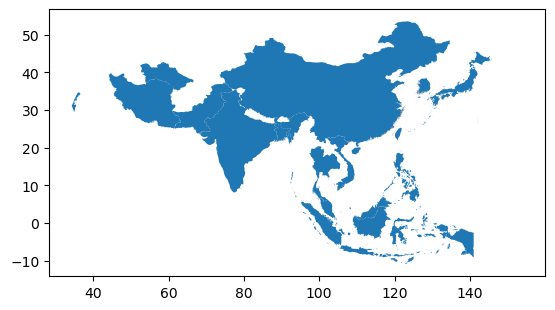

In [62]:
asia.geometry.plot()

## 5. Africa :

In [63]:
df_africa = master_df[master_df.Continent=='Africa']
df_africa.head()

,Continent,cuisine,Country_State,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg,veg,vegan
13007,Africa,Nigerian Recipes,Nigeria,5.0,100.0,7,214.0,33.0,4.0,7.0,10.0,1.0,1241.0,0.0,6.0,0,0,1
13008,Africa,Nigerian Recipes,Nigeria,4.2,76.0,19,332.0,60.0,0.0,2.0,8.0,1.0,391.0,4.0,6.0,0,0,1
13009,Africa,Nigerian Recipes,Nigeria,4.1,70.0,54,294.0,47.0,98.0,0.0,8.0,5.0,239.0,31.0,9.0,1,0,0
13010,Africa,Nigerian Recipes,Nigeria,4.9,10.0,14,3.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1
13011,Africa,Nigerian Recipes,Nigeria,4.8,5.0,41,4.0,1.0,0.0,0.0,0.0,0.0,195.0,0.0,0.0,0,0,1


In [64]:
df_africa.cuisine.unique()

array(['Nigerian Recipes', 'South African Recipes', 'sudanese Dishes',
       'Congolese cuisine', 'Tanzanian Dishes', 'North African Recipes',
       'Egyptian Recipes', 'Moroccan Recipes', 'East African Recipes'],
      dtype=object)

In [65]:
df_africa.Country_State.unique()

array(['Nigeria', 'South africa', 'Sudan', 'Congo', 'Tanzania',
       ' algeria', 'Egypt', 'Morocco', 'Ehiopia'], dtype=object)

In [66]:
df_africa.loc[df_africa['Country_State'] == 'South africa', 'Country_State'] = 'South Africa'
df_africa.loc[df_africa['Country_State'] == 'Ehiopia', 'Country_State'] = 'Ethiopia'
df_africa.loc[df_africa['Country_State'] == ' algeria', 'Country_State'] = 'Algeria'

In [67]:
# Ehiopia---'Ethiopia'
# ' Algeria'----Algeria
keep_values = list(set(World_Countries.COUNTRY.unique()).intersection(set(df_africa.Country_State.unique())))
africa_shape = World_Countries[World_Countries['COUNTRY'].isin(keep_values)]
keep_values

['South Africa',
 'Nigeria',
 'Algeria',
 'Sudan',
 'Congo',
 'Ethiopia',
 'Morocco',
 'Tanzania',
 'Egypt']

In [68]:
countries = list(df_africa.Country_State.unique())
countries

['Nigeria',
 'South Africa',
 'Sudan',
 'Congo',
 'Tanzania',
 'Algeria',
 'Egypt',
 'Morocco',
 'Ethiopia']

In [69]:
countries = list(df_africa.Country_State.unique())
cols = list(df_africa.columns)[3:]
africa = pd.DataFrame(columns=['COUNTRY'] + cols)

for country in countries:
    df_ = df_africa[df_africa.Country_State == country].copy()
    row = [country]
    for col in cols:
        # average wrt their countries
        if col == 'total_time':
            row.append(df_[col].median())
        else:
            row.append(df_[col].mean())
    africa.loc[len(africa)] = row
africa.iloc[:, -3:] = africa.iloc[:, -3:].apply(lambda x: x * 100)
africa = africa.rename(columns={col: col+'_perc' for col in africa.iloc[:, -3:].columns})
del df_

In [70]:
africa

,COUNTRY,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg_perc,veg_perc,vegan_perc
0,Nigeria,4.409804,75.0,104.901961,356.294118,39.764706,54.901961,5.764706,18.137255,5.019608,624.980392,11.294118,14.431373,47.058824,17.647059,35.294118
1,South Africa,4.470000,57.5,12.600000,225.300000,27.300000,36.900000,4.100000,6.400000,5.100000,360.500000,12.100000,11.700000,60.000000,20.000000,20.000000
2,Sudan,4.050000,76.0,56.647059,464.941176,41.029412,75.647059,6.382353,25.911765,5.294118,798.882353,7.676471,22.382353,70.588235,11.764706,17.647059
3,Congo,3.843750,42.5,14.375000,239.625000,30.062500,25.375000,4.937500,5.500000,2.125000,288.937500,6.500000,12.375000,18.750000,12.500000,68.750000
4,Tanzania,2.955172,75.0,19.931034,373.000000,43.758621,49.620690,8.689655,18.827586,4.448276,791.448276,8.448276,14.517241,55.172414,31.034483,13.793103
5,Algeria,4.100000,65.0,16.666667,197.333333,20.222222,23.333333,1.555556,4.888889,3.333333,144.000000,5.000000,10.888889,44.444444,22.222222,33.333333
6,Egypt,4.320000,17.0,12.000000,172.200000,18.600000,7.800000,1.600000,4.000000,2.200000,330.400000,7.600000,9.600000,20.000000,40.000000,40.000000
7,Morocco,3.780000,70.0,9.300000,221.200000,17.000000,68.600000,2.800000,13.600000,2.600000,918.700000,5.600000,11.700000,50.000000,0.000000,50.000000
8,Ethiopia,3.925000,37.5,20.500000,219.750000,23.000000,16.500000,3.000000,10.250000,6.250000,782.000000,15.750000,10.750000,0.000000,75.000000,25.000000


In [71]:
africa = pd.merge(left = africa_shape,
                right = africa,
                left_on = 'COUNTRY',
                right_on = 'COUNTRY',
                how = 'left')
africa = africa.reset_index(drop=True)
africa.to_file('Africa.shp', driver='ESRI Shapefile')
# africa.to_csv('Africa.csv',index=False)
africa

,COUNTRY,geometry,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg_perc,veg_perc,vegan_perc
0,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236...",4.100000,65.0,16.666667,197.333333,20.222222,23.333333,1.555556,4.888889,3.333333,144.000000,5.000000,10.888889,44.444444,22.222222,33.333333
1,Congo,"POLYGON ((15.89050 -3.94301, 15.88028 -3.95111...",3.843750,42.5,14.375000,239.625000,30.062500,25.375000,4.937500,5.500000,2.125000,288.937500,6.500000,12.375000,18.750000,12.500000,68.750000
2,Egypt,"POLYGON ((32.64902 29.78836, 32.60791 29.82361...",4.320000,17.0,12.000000,172.200000,18.600000,7.800000,1.600000,4.000000,2.200000,330.400000,7.600000,9.600000,20.000000,40.000000,40.000000
3,Ethiopia,"POLYGON ((45.48940 5.48976, 45.37447 5.36392, ...",3.925000,37.5,20.500000,219.750000,23.000000,16.500000,3.000000,10.250000,6.250000,782.000000,15.750000,10.750000,0.000000,75.000000,25.000000
4,Morocco,"POLYGON ((-3.38611 31.72611, -3.42000 31.70778...",3.780000,70.0,9.300000,221.200000,17.000000,68.600000,2.800000,13.600000,2.600000,918.700000,5.600000,11.700000,50.000000,0.000000,50.000000
5,Nigeria,"MULTIPOLYGON (((11.79944 7.29666, 11.75496 7.2...",4.409804,75.0,104.901961,356.294118,39.764706,54.901961,5.764706,18.137255,5.019608,624.980392,11.294118,14.431373,47.058824,17.647059,35.294118
6,South Africa,"MULTIPOLYGON (((17.17166 -28.10226, 17.18902 -...",4.470000,57.5,12.600000,225.300000,27.300000,36.900000,4.100000,6.400000,5.100000,360.500000,12.100000,11.700000,60.000000,20.000000,20.000000
7,Sudan,"POLYGON ((34.21807 9.96458, 34.20268 9.97690, ...",4.050000,76.0,56.647059,464.941176,41.029412,75.647059,6.382353,25.911765,5.294118,798.882353,7.676471,22.382353,70.588235,11.764706,17.647059
8,Tanzania,"MULTIPOLYGON (((38.49171 -11.41531, 38.41680 -...",2.955172,75.0,19.931034,373.000000,43.758621,49.620690,8.689655,18.827586,4.448276,791.448276,8.448276,14.517241,55.172414,31.034483,13.793103


<AxesSubplot:>

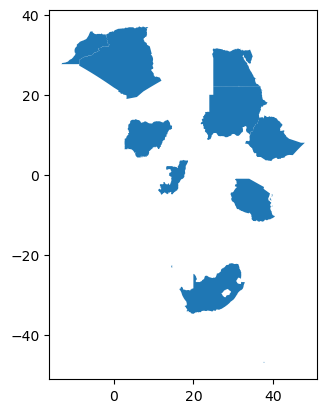

In [72]:
africa.geometry.plot()

## 6. Australia :

In [73]:
df_aus = master_df[master_df.Continent=='Australia']
df_aus.head()

,Continent,cuisine,Country_State,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg,veg,vegan
14519,Australia,Australian and New Zealander Recipes,Australia,4.7,40.0,143,222.0,33.0,20.0,1.0,2.0,6.0,174.0,19.0,10.0,0,1,0
14520,Australia,Australian and New Zealander Recipes,Australia,4.9,70.0,25,301.0,15.0,57.0,1.0,13.0,6.0,418.0,0.0,21.0,1,0,0
14521,Australia,Australian and New Zealander Recipes,Australia,4.8,135.0,96,210.0,18.0,54.0,1.0,2.0,9.0,29.0,16.0,15.0,1,0,0
14522,Australia,Australian and New Zealander Recipes,Australia,1.0,160.0,1,640.0,45.0,90.0,2.0,27.0,14.0,1079.0,1.0,38.0,1,0,0
14523,Australia,Australian and New Zealander Recipes,Australia,4.8,0.0,39,254.0,30.0,51.0,1.0,4.0,9.0,58.0,27.0,14.0,1,0,0


In [74]:
df_aus.cuisine.unique()

array(['Australian and New Zealander Recipes',
       'Australian and New Zealander Occasions'], dtype=object)

In [75]:
df_aus.Country_State.unique()

array(['Australia'], dtype=object)

In [76]:
oceania_countries = ["Australia", "New Zealand"]
oceania = World_Countries[World_Countries['COUNTRY'].isin(oceania_countries)]
oceania

,COUNTRY,geometry
11,Australia,"MULTIPOLYGON (((142.27997 -10.26556, 142.21053..."
169,New Zealand,"MULTIPOLYGON (((177.91779 -38.94280, 177.90970..."


In [77]:
from shapely.ops import unary_union
# Convert the "geometry" column to a list of shapely geometries
geoms = oceania["geometry"].tolist()

# Use unary_union to combine the geometries into a single MultiPolygon
merged_geom = unary_union(geoms)

# Create a new geopandas dataframe with the merged geometry
aus_shape = gpd.GeoDataFrame({"COUNTRY": ["Australia"], "geometry": [merged_geom]})

In [78]:
aus_shape

,COUNTRY,geometry
0,Australia,"MULTIPOLYGON (((169.18552 -52.57695, 169.16165..."


In [79]:
countries = list(df_aus.Country_State.unique())
cols = list(df_aus.columns)[3:]
aus_nz = pd.DataFrame(columns=['COUNTRY'] + cols)

for country in countries:
    df_ = df_aus[df_aus.Country_State == country].copy()
    row = [country]
    for col in cols:
        # average wrt their countries
        if col == 'total_time':
            row.append(df_[col].median())
        else:
            row.append(df_[col].mean())
    aus_nz.loc[len(aus_nz)] = row
aus_nz.iloc[:, -3:] = aus_nz.iloc[:, -3:].apply(lambda x: x * 100)
aus_nz = aus_nz.rename(columns={col: col+'_perc' for col in aus_nz.iloc[:, -3:].columns})
del df_

In [80]:
aus_nz

,COUNTRY,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg_perc,veg_perc,vegan_perc
0,Australia,4.129787,60.0,49.702128,266.510638,36.404255,35.382979,1.531915,4.382979,6.170213,225.510638,21.021277,12.212766,65.957447,25.531915,8.510638


In [81]:
aus_nz = pd.merge(left = aus_shape,
                right = aus_nz,
                left_on = 'COUNTRY',
                right_on = 'COUNTRY',
                how = 'left')
aus_nz = aus_nz.reset_index(drop=True)
aus_nz.to_file('Australia.shp', driver='ESRI Shapefile')
# aus_nz.to_csv('Australia.csv',index=False)
aus_nz

,COUNTRY,geometry,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg_perc,veg_perc,vegan_perc
0,Australia,"MULTIPOLYGON (((169.18552 -52.57695, 169.16165...",4.129787,60.0,49.702128,266.510638,36.404255,35.382979,1.531915,4.382979,6.170213,225.510638,21.021277,12.212766,65.957447,25.531915,8.510638


(100.0, 180.0)

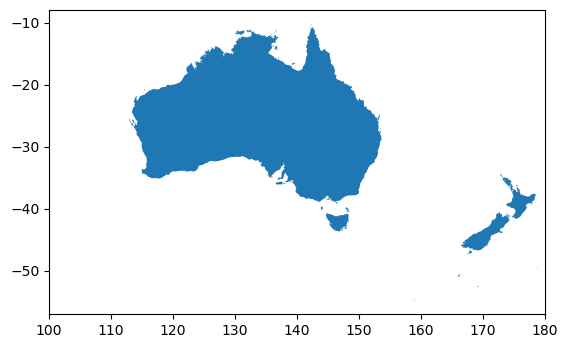

In [82]:
aus_nz.plot()
plt.xlim((100,180))

## 7. Europe :

In [83]:
df_EU = master_df[master_df.Continent=='Europe']
df_EU.head()

,Continent,cuisine,Country_State,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg,veg,vegan
6252,Europe,Irish Recipes,Ireland,3.8,506.0,5,334.0,30.0,52.0,5.0,18.0,5.0,365.0,7.0,15.0,1,0,0
6253,Europe,Irish Recipes,Ireland,4.6,95.0,538,517.0,37.0,132.0,4.0,29.0,13.0,301.0,1.0,28.0,1,0,0
6254,Europe,Irish Recipes,Ireland,4.8,80.0,49,222.0,39.0,42.0,1.0,6.0,3.0,361.0,14.0,5.0,1,0,0
6255,Europe,Irish Recipes,Ireland,4.7,150.0,1347,839.0,69.0,147.0,12.0,50.0,13.0,3378.0,0.0,41.0,1,0,0
6256,Europe,Irish Recipes,Ireland,4.9,180.0,1192,528.0,42.0,96.0,5.0,29.0,10.0,1605.0,9.0,25.0,1,0,0


In [84]:
df_EU.cuisine.unique()

array(['Irish Recipes', 'Irish Soda Bread', 'Guinness® Recipes',
       'Irish Stew', "St. Patrick's Day Recipes",
       "St. Patrick's Day Side Dishes", "St. Patrick's Day Desserts",
       "St. Patrick's Day Breakfast and Brunch",
       "St. Patrick's Day Appetizers", "St. Patrick's Day Main Dishes",
       "Shepherd's Pie", 'Lamb Stew', 'Swedish Recipes',
       'Norwegian Recipes', 'French Recipes', 'French Bread',
       'French Main Dishes', 'French Chicken Main Dishes',
       'French Desserts', 'French Soups and Stews', 'French Appetizers',
       'Swiss Recipes', 'Spanish Recipes', 'Spanish Main Dishes',
       'Spanish Appetizers', 'Spanish Soups and Stews', 'Sangria',
       'Finnish Recipes', 'Hungarian Recipes', 'Belgian Recipes',
       'Dutch Recipes', 'Russian Recipes', 'Italian Recipes',
       'Italian Main Dishes', 'Italian Pork Main Dishes',
       'Italian Turkey Main Dishes', 'Italian Beef Main Dishes',
       'Italian Chicken Main Dishes', 'Italian Seafood Main

In [85]:
df_EU.Country_State.unique()

array(['Ireland', 'Sweden', 'Norway', 'France', 'Switzerland', 'Spain',
       'Finland', 'Hungary', 'Belgium', 'Dutch', 'Russia', 'Italy',
       'Austria', 'Greece', 'Wales', 'Poland', 'Mediterranean', 'Denmark',
       'Czech republic', 'Portugal', 'Germany', 'Uk', 'Scotland'],
      dtype=object)

In [86]:
# Dutch -- Netherlands
# Wales -- 
# Mediterranean -- 
# Scotland --
# 'United Kingdom' -- UK

In [87]:
df_EU.loc[df_EU['Country_State'] == 'Czech republic', 'Country_State'] = 'Czech Republic'
df_EU.loc[df_EU['Country_State'] == 'Uk', 'Country_State'] = 'UK'

In [88]:
keep_values = list(set(Europe.NAME.unique()).intersection(set(df_EU.Country_State.unique())))+['United Kingdom','Netherlands']
eur_shape = Europe[Europe['NAME'].isin(keep_values)]
eur_shape['NAME'] = eur_shape['NAME'].replace({'United Kingdom':'UK',
                                    'Netherlands':'Dutch'})
eur_shape = eur_shape.rename(columns={'NAME':'COUNTRY'})
eur_shape.COUNTRY.unique()

array(['Austria', 'Belgium', 'Czech Republic', 'Denmark', 'Finland',
       'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy',
       'Dutch', 'Norway', 'Poland', 'Portugal', 'Spain', 'Sweden',
       'Switzerland', 'UK', 'Russia'], dtype=object)

In [89]:
set(df_EU.Country_State.unique())-set(eur_shape.COUNTRY.unique())

{'Mediterranean', 'Scotland', 'Wales'}

In [90]:
mediterranean_countries = ["Albania", " algeria", "Bosnia and Herzegovina", "Croatia", "Cyprus", "Egypt", "France", "Greece", "Israel", "Italy", "Lebanon", "Libya", "Malta", "Monaco", "Montenegro", "Morocco", "Palestine", "Portugal", "Slovenia", "Spain", "Syria", "Tunisia", "Turkey"]
Mediterranean = set(mediterranean_countries)-set(master_df.Country_State.unique())
Mediterranean

{'Albania',
 'Bosnia and Herzegovina',
 'Croatia',
 'Cyprus',
 'Libya',
 'Malta',
 'Monaco',
 'Montenegro',
 'Palestine',
 'Slovenia',
 'Syria',
 'Tunisia'}

<AxesSubplot:>

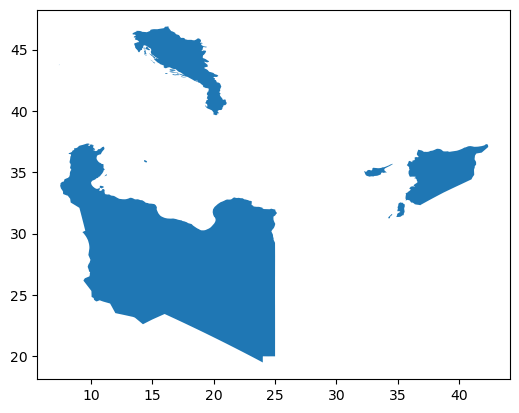

In [91]:
medi_shape = World_Countries[World_Countries['COUNTRY'].isin(Mediterranean)]
from shapely.ops import unary_union
# Convert the "geometry" column to a list of shapely geometries
geoms = medi_shape["geometry"].tolist()

# Use unary_union to combine the geometries into a single MultiPolygon
merged_geom = unary_union(geoms)

# Create a new geopandas dataframe with the merged geometry
medi_shape = gpd.GeoDataFrame({"COUNTRY": ["Mediterranean"], "geometry": [merged_geom]})
medi_shape.plot()

In [92]:
eur_shape = eur_shape.drop(['ORGN_NAME'],axis=1)

In [93]:
eur_shape = pd.concat([eur_shape,medi_shape],axis=0)
eur_shape

,COUNTRY,geometry
2,Austria,"POLYGON ((16.00000 48.77775, 16.00000 48.78252..."
3,Belgium,"POLYGON ((5.00000 49.79374, 4.99724 49.79696, ..."
6,Czech Republic,"POLYGON ((14.82523 50.87399, 14.83687 50.86996..."
7,Denmark,"MULTIPOLYGON (((11.99978 54.94118, 11.98534 54..."
9,Finland,"MULTIPOLYGON (((22.07310 60.22830, 22.06502 60..."
10,France,"MULTIPOLYGON (((-2.28137 46.68570, -2.31121 46..."
11,Germany,"MULTIPOLYGON (((13.11717 54.54924, 13.12529 54..."
13,Greece,"MULTIPOLYGON (((24.74283 37.59560, 24.73534 37..."
15,Hungary,"POLYGON ((22.32725 48.36194, 22.32294 48.32583..."
16,Ireland,"MULTIPOLYGON (((-10.21726 51.74543, -10.22042 ..."


In [94]:
scot = gpd.read_file('/kaggle/input/shape-files-world/Scotland_boundary/Scotland boundary.shp')
wales = gpd.read_file('/kaggle/input/shape-files-world/Wales_boundary/Wales boundary.shp')

In [95]:
wales.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [96]:
crs_out = 'EPSG:4326'
# Transform the GeoDataFrame to the desired output CRS
scot = scot.to_crs(crs_out)
wales = wales.to_crs(crs_out)

In [97]:
eur_shape = pd.concat([eur_shape,wales.rename(columns={'NAME':'COUNTRY'}),scot.rename(columns={'NAME':'COUNTRY'})],axis=0)
russia = World_Countries[World_Countries.COUNTRY=='Russia']
eur_shape = eur_shape.drop([53])
eur_shape = pd.concat([eur_shape,russia],axis=0)
eur_shape.reset_index(drop=True,inplace=True)
eur_shape

,COUNTRY,geometry
0,Austria,"POLYGON ((16.00000 48.77775, 16.00000 48.78252..."
1,Belgium,"POLYGON ((5.00000 49.79374, 4.99724 49.79696, ..."
2,Czech Republic,"POLYGON ((14.82523 50.87399, 14.83687 50.86996..."
3,Denmark,"MULTIPOLYGON (((11.99978 54.94118, 11.98534 54..."
4,Finland,"MULTIPOLYGON (((22.07310 60.22830, 22.06502 60..."
5,France,"MULTIPOLYGON (((-2.28137 46.68570, -2.31121 46..."
6,Germany,"MULTIPOLYGON (((13.11717 54.54924, 13.12529 54..."
7,Greece,"MULTIPOLYGON (((24.74283 37.59560, 24.73534 37..."
8,Hungary,"POLYGON ((22.32725 48.36194, 22.32294 48.32583..."
9,Ireland,"MULTIPOLYGON (((-10.21726 51.74543, -10.22042 ..."


In [98]:
countries = list(df_EU.Country_State.unique())
cols = list(df_EU.columns)[3:]
europe = pd.DataFrame(columns=['COUNTRY'] + cols)

for country in countries:
    df_ = df_EU[df_EU.Country_State == country].copy()
    row = [country]
    for col in cols:
        # average wrt their countries
        if col == 'total_time':
            row.append(df_[col].median())
        else:
            row.append(df_[col].mean())
    europe.loc[len(europe)] = row
europe.iloc[:, -3:] = europe.iloc[:, -3:].apply(lambda x: x * 100)
europe = europe.rename(columns={col: col+'_perc' for col in europe.iloc[:, -3:].columns})
del df_

In [99]:
europe = pd.merge(left = eur_shape,
                right = europe,
                left_on = 'COUNTRY',
                right_on = 'COUNTRY',
                how = 'left')
europe = europe.reset_index(drop=True)
europe.to_file('Europe.shp', driver='ESRI Shapefile')
# europe.to_csv('Europe.csv',index=False)
europe

,COUNTRY,geometry,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg_perc,veg_perc,vegan_perc
0,Austria,"POLYGON ((16.00000 48.77775, 16.00000 48.78252...",3.942857,85.0,47.476190,354.952381,42.571429,81.142857,2.047619,10.285714,6.904762,148.571429,20.571429,16.571429,80.952381,14.285714,4.761905
1,Belgium,"POLYGON ((5.00000 49.79374, 4.99724 49.79696, ...",4.516667,107.5,12.666667,382.166667,33.833333,107.666667,1.833333,17.833333,8.666667,468.666667,10.333333,19.500000,100.000000,0.000000,0.000000
2,Czech Republic,"POLYGON ((14.82523 50.87399, 14.83687 50.86996...",4.412500,187.5,26.250000,189.250000,22.375000,35.625000,1.375000,6.750000,3.625000,520.375000,6.250000,8.875000,75.000000,25.000000,0.000000
3,Denmark,"MULTIPOLYGON (((11.99978 54.94118, 11.98534 54...",3.925000,72.5,40.250000,181.300000,22.300000,39.700000,1.500000,5.450000,3.900000,355.800000,8.850000,8.250000,60.000000,35.000000,5.000000
4,Finland,"MULTIPOLYGON (((22.07310 60.22830, 22.06502 60...",3.280000,85.0,31.666667,389.000000,43.133333,74.133333,3.533333,13.733333,9.133333,537.866667,13.600000,18.466667,66.666667,20.000000,13.333333
5,France,"MULTIPOLYGON (((-2.28137 46.68570, -2.31121 46...",4.160101,85.0,154.505051,414.277778,30.373737,107.404040,2.616162,17.525253,10.722222,596.611111,9.196970,24.348485,77.272727,15.151515,7.575758
6,Germany,"MULTIPOLYGON (((13.11717 54.54924, 13.12529 54...",4.300000,80.0,95.350877,331.377193,31.228070,59.122807,2.500000,13.973684,6.517544,920.877193,9.377193,16.666667,66.666667,19.298246,14.035088
7,Greece,"MULTIPOLYGON (((24.74283 37.59560, 24.73534 37...",4.210811,60.0,117.135135,351.472973,27.328829,58.279279,3.256757,15.382883,6.400901,597.063063,6.490991,21.135135,45.945946,34.684685,19.369369
8,Hungary,"POLYGON ((22.32725 48.36194, 22.32294 48.32583...",3.837838,90.0,148.540541,408.270270,31.405405,90.864865,2.918919,19.837838,8.972973,616.945946,9.648649,22.864865,81.081081,10.810811,8.108108
9,Ireland,"MULTIPOLYGON (((-10.21726 51.74543, -10.22042 ...",4.057460,80.0,108.206349,397.936508,37.844444,72.149206,4.104762,17.161905,8.301587,705.269841,11.736508,19.692063,75.873016,17.777778,6.349206


<AxesSubplot:>

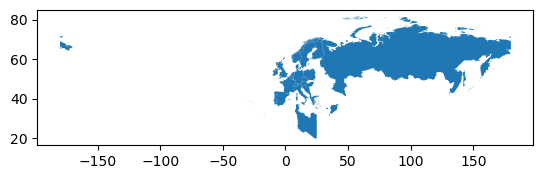

In [100]:
europe.geometry.plot()

# Master Geographical data  :

In [101]:
# us_states
# north_america
# south_america
# asia
# africa
# aus_nz
# europe

In [102]:
north_america

,COUNTRY,geometry,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg_perc,veg_perc,vegan_perc
0,Canada,"MULTIPOLYGON (((-84.47945 77.29443, -84.46764 ...",4.148440,45.0,300.983563,279.903053,25.604160,49.991278,2.490104,12.965783,5.510902,497.478028,11.120094,14.028178,42.670245,29.855753,27.474002
1,Cuba,"MULTIPOLYGON (((-76.94608 21.45221, -76.88390 ...",4.241509,85.0,43.283019,353.226415,25.547170,67.924528,3.320755,22.037736,4.905660,797.528302,7.396226,16.905660,64.150943,5.660377,30.188679
2,Jamaica,"POLYGON ((-76.65770 17.92925, -76.69362 17.937...",4.353846,75.0,84.076923,315.051282,30.615385,62.512821,2.923077,17.307692,5.076923,917.256410,10.230769,14.153846,66.666667,12.820513,20.512821
3,Mexico,"MULTIPOLYGON (((-97.77687 22.26805, -97.78168 ...",4.160623,55.0,158.222852,387.898961,34.969783,75.067044,4.715770,20.077432,7.442871,820.056657,6.928234,19.142587,69.027384,16.430595,14.542021
4,Puerto Rico (US),"MULTIPOLYGON (((-65.83667 18.05583, -65.84029 ...",4.427273,65.0,35.818182,348.472727,37.254545,52.618182,2.400000,13.763636,6.218182,686.963636,13.818182,16.200000,54.545455,25.454545,20.000000
5,United States,"MULTIPOLYGON (((-75.17029 19.93139, -75.22372 ...",4.165172,50.0,180.799777,323.669113,33.104340,74.219209,2.293555,11.830249,6.281110,532.473357,14.241225,16.371889,69.097001,18.107849,12.795150


In [103]:
cols = list(north_america.columns)[2:]
continent_df = pd.DataFrame(columns=['Continent'] + cols)
continents = ['North America', 'Asia', 'Europe', 'Africa', 'Australia','South America']
datasets = [north_america, asia, europe, africa, aus_nz, south_america]
for i, continent_data in enumerate(datasets):
    row = [continents[i]]
    for col in cols:
        row.append(continent_data[col].mean())
    continent_df.loc[i] = row

In [104]:
continent_df

,Continent,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg_perc,veg_perc,vegan_perc
0,North America,4.249477,62.500000,133.864052,334.703592,31.182564,63.722177,3.023877,16.330421,5.905941,708.626065,10.622455,16.133694,61.026282,18.054939,20.918779
1,Asia,3.855310,67.566667,59.202747,354.346456,30.401001,69.967289,3.393846,18.614608,6.106824,739.995707,8.788802,18.059693,61.830032,15.975037,22.194930
2,Europe,4.098046,75.260870,69.484360,333.136360,32.244092,67.033623,2.691375,13.303378,6.925274,517.137400,10.879185,16.936681,67.471449,20.729852,11.798699
3,Africa,3.983747,57.277778,29.657969,274.404847,28.970829,39.853116,4.314419,11.946166,4.041148,559.983169,8.885429,13.149428,40.668213,25.574274,33.757513
4,Australia,4.129787,60.000000,49.702128,266.510638,36.404255,35.382979,1.531915,4.382979,6.170213,225.510638,21.021277,12.212766,65.957447,25.531915,8.510638
5,South America,3.820709,61.000000,31.702489,337.484877,31.285426,56.914662,2.684574,11.541246,5.345513,403.794335,8.402387,18.766740,56.738437,19.964457,23.297106


In [105]:
from shapely.ops import unary_union

continents = ['North America', 'Asia', 'Europe', 'Africa', 'Australia','South America']
datasets = [north_america, asia, europe, africa, aus_nz, south_america]
master_geom = pd.DataFrame()
for i, continent_data in enumerate(datasets):
    geoms = continent_data["geometry"].tolist()
    merged_geom = unary_union(geoms)
    df_ = gpd.GeoDataFrame({"Continent": [continents[i]], "geometry": [merged_geom]})
    master_geom = pd.concat([master_geom,df_],axis=0)
del df_

In [106]:
master_geom.reset_index(drop=True,inplace=True)
master_geom

,Continent,geometry
0,North America,"MULTIPOLYGON (((-155.539 19.103, -155.551 19.0..."
1,Asia,"MULTIPOLYGON (((105.114 -6.611, 105.164 -6.567..."
2,Europe,"MULTIPOLYGON (((25.001 22.000, 25.001 21.010, ..."
3,Africa,"MULTIPOLYGON (((37.698 -46.962, 37.643 -46.960..."
4,Australia,"MULTIPOLYGON (((169.008 -52.536, 169.000 -52.5..."
5,South America,"MULTIPOLYGON (((-73.239 -54.038, -73.183 -54.0..."


<AxesSubplot:>

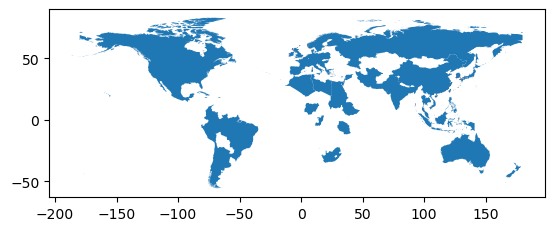

In [107]:
master_geom.plot()

In [108]:
world = pd.merge(left = master_geom,
                right = continent_df,
                left_on = 'Continent',
                right_on = 'Continent',
                how = 'left')
world = world.reset_index(drop=True)
# world.to_csv('World.csv',index=False)
world.to_file('World.shp', driver='ESRI Shapefile')
world

,Continent,geometry,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg_perc,veg_perc,vegan_perc
0,North America,"MULTIPOLYGON (((-155.539 19.103, -155.551 19.0...",4.249477,62.500000,133.864052,334.703592,31.182564,63.722177,3.023877,16.330421,5.905941,708.626065,10.622455,16.133694,61.026282,18.054939,20.918779
1,Asia,"MULTIPOLYGON (((105.114 -6.611, 105.164 -6.567...",3.855310,67.566667,59.202747,354.346456,30.401001,69.967289,3.393846,18.614608,6.106824,739.995707,8.788802,18.059693,61.830032,15.975037,22.194930
2,Europe,"MULTIPOLYGON (((25.001 22.000, 25.001 21.010, ...",4.098046,75.260870,69.484360,333.136360,32.244092,67.033623,2.691375,13.303378,6.925274,517.137400,10.879185,16.936681,67.471449,20.729852,11.798699
3,Africa,"MULTIPOLYGON (((37.698 -46.962, 37.643 -46.960...",3.983747,57.277778,29.657969,274.404847,28.970829,39.853116,4.314419,11.946166,4.041148,559.983169,8.885429,13.149428,40.668213,25.574274,33.757513
4,Australia,"MULTIPOLYGON (((169.008 -52.536, 169.000 -52.5...",4.129787,60.000000,49.702128,266.510638,36.404255,35.382979,1.531915,4.382979,6.170213,225.510638,21.021277,12.212766,65.957447,25.531915,8.510638
5,South America,"MULTIPOLYGON (((-73.239 -54.038, -73.183 -54.0...",3.820709,61.000000,31.702489,337.484877,31.285426,56.914662,2.684574,11.541246,5.345513,403.794335,8.402387,18.766740,56.738437,19.964457,23.297106


<AxesSubplot:>

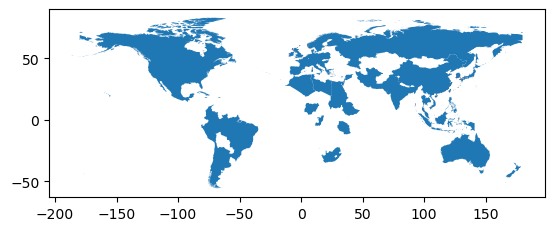

In [109]:
world.geometry.plot()

In [110]:
north_america.columns

Index(['COUNTRY', 'geometry', 'rating', 'total_time', 'rating_count',
       'calories', 'carbohydrateContent', 'cholesterolContent', 'fiberContent',
       'proteinContent', 'saturatedFatContent', 'sodiumContent',
       'sugarContent', 'fatContent', 'nveg_perc', 'veg_perc', 'vegan_perc'],
      dtype='object')

In [111]:
cols = list(north_america.columns)
world_master = pd.DataFrame(columns=['Continent']+cols)
continents = ['North America', 'Asia', 'Europe', 'Africa', 'Australia','South America']
datasets = [north_america, asia, europe, africa, aus_nz, south_america]
for i, continent_data in enumerate(datasets):
    continent_data['Continent'] = continents[i]
    world_master = pd.concat([world_master,continent_data],axis=0)

In [112]:
world_master.reset_index(drop=True,inplace=True)
world_master = gpd.GeoDataFrame(world_master)
# world_master.to_csv('World Master.csv',index=False)
world_master.to_file('World Master.shp', driver='ESRI Shapefile')
world_master

,Continent,COUNTRY,geometry,rating,total_time,rating_count,calories,carbohydrateContent,cholesterolContent,fiberContent,proteinContent,saturatedFatContent,sodiumContent,sugarContent,fatContent,nveg_perc,veg_perc,vegan_perc
0,North America,Canada,"MULTIPOLYGON (((-84.479 77.294, -84.468 77.301...",4.148440,45.0,300.983563,279.903053,25.604160,49.991278,2.490104,12.965783,5.510902,497.478028,11.120094,14.028178,42.670245,29.855753,27.474002
1,North America,Cuba,"MULTIPOLYGON (((-76.946 21.452, -76.884 21.420...",4.241509,85.0,43.283019,353.226415,25.547170,67.924528,3.320755,22.037736,4.905660,797.528302,7.396226,16.905660,64.150943,5.660377,30.188679
2,North America,Jamaica,"POLYGON ((-76.658 17.929, -76.694 17.937, -76....",4.353846,75.0,84.076923,315.051282,30.615385,62.512821,2.923077,17.307692,5.076923,917.256410,10.230769,14.153846,66.666667,12.820513,20.512821
3,North America,Mexico,"MULTIPOLYGON (((-97.777 22.268, -97.782 22.198...",4.160623,55.0,158.222852,387.898961,34.969783,75.067044,4.715770,20.077432,7.442871,820.056657,6.928234,19.142587,69.027384,16.430595,14.542021
4,North America,Puerto Rico (US),"MULTIPOLYGON (((-65.837 18.056, -65.840 18.044...",4.427273,65.0,35.818182,348.472727,37.254545,52.618182,2.400000,13.763636,6.218182,686.963636,13.818182,16.200000,54.545455,25.454545,20.000000
5,North America,United States,"MULTIPOLYGON (((-75.170 19.931, -75.224 19.902...",4.165172,50.0,180.799777,323.669113,33.104340,74.219209,2.293555,11.830249,6.281110,532.473357,14.241225,16.371889,69.097001,18.107849,12.795150
6,Asia,Bangladesh,"MULTIPOLYGON (((92.330 20.613, 92.330 20.609, ...",4.050000,76.0,67.250000,331.666667,25.583333,109.916667,4.583333,21.666667,4.583333,524.916667,8.250000,16.250000,41.666667,16.666667,41.666667
7,Asia,China,"MULTIPOLYGON (((109.700 18.186, 109.701 18.186...",3.910156,45.0,110.976562,374.934896,32.117188,82.247396,3.276042,22.304688,4.330729,966.830729,9.296875,17.710938,84.895833,2.083333,13.020833
8,Asia,India,"MULTIPOLYGON (((93.802 6.854, 93.804 6.853, 93...",3.957447,50.0,121.612766,236.770213,28.531915,23.208511,3.523404,8.395745,4.157447,347.638298,10.208511,10.617021,21.702128,33.617021,44.680851
9,Asia,Japan,"MULTIPOLYGON (((123.807 24.043, 123.805 24.043...",4.068000,50.0,65.040000,363.120000,34.026667,80.866667,2.000000,18.386667,3.960000,1120.013333,7.400000,16.546667,73.333333,2.666667,24.000000


In [113]:
type(world_master)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

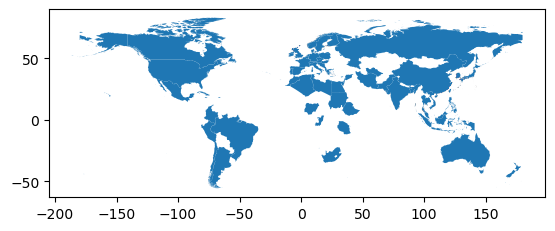

In [114]:
world_master.geometry.plot()

# reference:
- https://www.efrainmaps.es/english-version/free-downloads/
- https://datashare.ed.ac.uk/handle/10283/2409
- https://geodata.lib.utexas.edu/catalog/stanford-xr801bn2282